In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
data_set=pd.read_csv("news.csv")

In [42]:
data_set.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [43]:
data_set.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [44]:
data_set.drop(["Unnamed: 0","text"],axis=1,inplace=True)

In [45]:
data_set

,title,label
0,You Can Smell Hillary’s Fear,FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE
2,Kerry to go to Paris in gesture of sympathy,REAL
3,Bernie supporters on Twitter erupt in anger ag...,FAKE
4,The Battle of New York: Why This Primary Matters,REAL
...,...,...
6330,State Department says it can't find emails fro...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...",REAL


In [46]:
from sklearn.preprocessing import LabelEncoder
news_encoder=LabelEncoder()
data_set["label"]=news_encoder.fit_transform(data_set["label"].values)

In [47]:
import re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords


In [48]:
corpus=[]

for i in range(len(data_set)):
    news=re.sub("[^a-zA-Z]",' ',data_set["title"][i])
    news=news.lower()
    news=news.split()
    ps=PorterStemmer()
    all_stopwords=stopwords.words("english")
    all_stopwords.remove("not")

    news=[ps.stem(word) for word in news if not word in set(all_stopwords)]
    news=' '.join(news)
    corpus.append(news)

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1600)
x=cv.fit_transform(corpus).toarray()
y=data_set.iloc[:,-1].values

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05,random_state=42)

LOGISTIC REGRESSION

In [51]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression()
log_classifier.fit(x_train, y_train)

LogisticRegression()

In [52]:
log_classifier.score(x_train,y_train)

0.8921568627450981

In [53]:
log_classifier.score(x_test,y_test)

0.8296529968454258

KNN



In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(metric="minkowski")
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [55]:
knn_classifier.score(x_train,y_train)

0.7537387836490529

In [56]:
knn_classifier.score(x_test,y_test)

0.6782334384858044

SVC

In [57]:
from sklearn.svm import SVC
svc_classifier=SVC(kernel="rbf",random_state=42)
svc_classifier.fit(x_train,y_train)

SVC(random_state=42)

In [58]:
svc_classifier.score(x_train,y_train)

0.951312728481223

In [59]:
svc_classifier.score(x_test,y_test)

0.8391167192429022

## Naive Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB
bayes_classifier=GaussianNB()
bayes_classifier.fit(x_train,y_train)

GaussianNB()

In [61]:
bayes_classifier.score(x_train,y_train)

0.7869724160850781

In [62]:
bayes_classifier.score(x_test,y_test)

0.7350157728706624

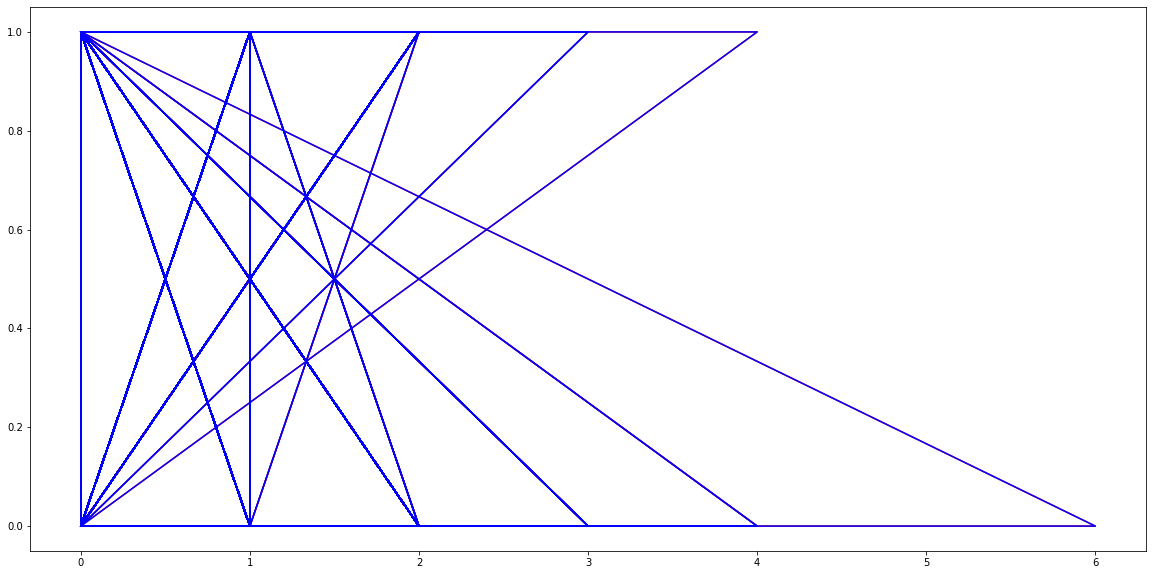

In [63]:
plt.figure(figsize=(20,10))
plt.plot(x_train,y_train,"r")
plt.plot(x_train,bayes_classifier.predict(x_train),"b")
plt.show()

In [64]:
train_predict=bayes_classifier.predict(x_train)
test_predict=bayes_classifier.predict(x_test)

In [65]:
from sklearn.metrics import confusion_matrix
print("Train Naive Bayes Confusion Matrix:\n ",confusion_matrix(y_train,train_predict))
print("Test Naive Bayes Confusion Matrix:\n ",confusion_matrix(y_test,test_predict))

Train Naive Bayes Confusion Matrix:
  [[1956 1040]
 [ 242 2780]]
Test Naive Bayes Confusion Matrix:
  [[103  65]
 [ 19 130]]


## Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier=DecisionTreeClassifier(criterion="entropy",random_state=42)
tree_classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [67]:
tree_classifier.score(x_train,y_train)

0.9981721502160186

In [68]:
tree_classifier.score(x_test,y_test)

0.7444794952681388

## Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
forest_classifier=RandomForestClassifier(random_state=42)
forest_classifier.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [70]:
forest_classifier.score(x_train,y_train)

0.9981721502160186

In [71]:
forest_classifier.score(x_test,y_test)

0.7728706624605678

In [72]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train,y_train)



C:\Users\sayan\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:44:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [73]:
model.score(x_train,y_train)

0.8439680957128615

In [74]:
model.score(x_test,y_test)

0.804416403785489

Stochasticgradientclassifier 


In [75]:
# from sklearn.linear_model import SGDClassifier
# SGD_Classifier = SGDClassifier()
# SGD_Classifier.fit(x_train,y_train)

In [76]:
text="The inane spectacle of the GOP debate: Cruz the showboating creep, Rubio the slick operator & Bush the desperate flop"
test_corpus=[]

test=re.sub("[^a-zA-Z]",' ',text)
test=test.lower()
test=test.split()
ps=PorterStemmer()
all_stopwords=stopwords.words("english")
all_stopwords.remove("not")

test=[ps.stem(word) for word in test if not word in set(all_stopwords)]
test=' '.join(test)
test_corpus.append(test)


test=cv.transform(test_corpus).toarray()

pred=svc_classifier.predict(test)
pred=(pred>0.5)
predict=np.multiply(pred,1)
news_encoder.inverse_transform(predict)

array(['REAL'], dtype=object)

In [77]:
import pickle

In [78]:
pickle.dump(cv,open("transform.pkl","wb"))

In [ ]:
pickle.dump(svc_classifier,open("transfer.pkl","wb"))